<h2>Problem Statement</h2><br>
<p>The present generation is highly motivated towards the use of credit cards. There are a large number of applications for the credit card and it becomes very tedious for the bank to decide which person should be approved a credit card and which not. The list of defaulters is increasing and this brings trouble for the bank and other customers too. The bank needs ways to minimise this number for the proper functioning of the credit card feature and expand to a wider audience. It is where the role of Machine Learning and Data Science comes into play. The tedious task can be dealt with Machine Learning by training the models with minimized errors.</p>

<h2>Task</h2><br>
<p>The bank has provided the data of customers with certain attributes. You need to predict if the customer would be approved a credit card or not. If the credit card is approved, it is denoted with ‘+’ and if it is not approved then it is denoted with '-'. </p>



<h2>Step 1: Import all required packages </h2>

In [307]:
#import all required packages
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [308]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [309]:
#Take a look at you dataset
train.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [310]:
#Check cols and rows
train.shape

(590, 17)

In [311]:
test.shape

(100, 16)

In [312]:
#Take a look at test dataset
test.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


<h2>Step 2: Data Preprocessing </h2><br>
<ul><b>Will do following things in conversion</b>
    <li>Conversion of Age from Object to Float </li>
    <li>Conversion of Zipcode from Object to int</li>
    <li>Conversion of remaining object types to category</li>
    <li>Finally, Convert category to cat codes</li>
</ul>    
<h2>Data cleaning</h2>
<p>Replace NAN values with mean values of respective column instead of dropping nulls and NANs</p>

In [313]:
train.dtypes

Key                 int64
Male               object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object

In [314]:
#Replace ? and null values in Age column with mean age value 
train['numericAge'] = train.loc[train.Age != '?', 'Age']
train['numericAge'] = train['numericAge'].astype('float64')
print('Mean Age ',train['numericAge'].mean())
train.loc[train.Age == '?', 'Age'] = train['numericAge'].mean()
train['Age'] = train['Age'].astype('float64')
train['Age'].fillna((train['Age'].mean()), inplace=True)

Mean Age  31.25826989619377


In [315]:
#Replace null and ? values in zipcode with least and most frequent values
train['numericZip'] = train.loc[train.ZipCode != '?', 'ZipCode']
s = train['numericZip'].value_counts()
train.loc[train.ZipCode == '?', 'ZipCode'] = s.index[-1]
train['ZipCode'] = train['ZipCode'].astype('int64')
train['ZipCode'].fillna(s.index[0], inplace=True)

In [317]:
#Covert column from object to category type
train['Male'] = train['Male'].astype('category')
train['Married'] = train['Married'].astype('category')
train['BankCustomer'] = train['BankCustomer'].astype('category')
train['EducationLevel'] = train['EducationLevel'].astype('category')
train['Ethnicity'] = train['Ethnicity'].astype('category')
train['PriorDefault'] = train['PriorDefault'].astype('category')
train['Employed'] = train['Employed'].astype('category')
train['DriversLicense'] = train['DriversLicense'].astype('category')
train['Citizen'] = train['Citizen'].astype('category')

cat_columns = train.select_dtypes(['category']).columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.cat.codes)


In [318]:
train.describe()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,numericAge
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.00000,590.000000,590.000000,590.000000,590.000000,590.000000,578.000000
mean,295.500000,1.659322,31.258270,4.609390,2.227119,1.494915,6.593220,5.966102,2.088534,0.493220,0.40678,2.045763,0.445763,0.189831,184.823729,918.706780,31.258270
std,170.462606,0.512200,11.891231,4.849569,0.493706,0.879385,4.308631,2.649061,3.198681,0.500378,0.49165,3.702375,0.497471,0.575001,174.354388,5025.415369,12.014247
min,1.000000,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000
25%,148.250000,1.000000,22.500000,1.000000,2.000000,1.000000,2.000000,4.000000,0.165000,0.000000,0.00000,0.000000,0.000000,0.000000,80.000000,0.000000,22.500000
50%,295.500000,2.000000,28.375000,2.710000,2.000000,1.000000,6.000000,8.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,160.000000,4.000000,28.125000
75%,442.750000,2.000000,37.290000,7.000000,2.750000,2.750000,11.000000,8.000000,2.500000,1.000000,1.00000,2.000000,1.000000,0.000000,273.500000,363.000000,37.500000
max,590.000000,2.000000,80.250000,26.335000,3.000000,3.000000,14.000000,9.000000,20.000000,1.000000,1.00000,20.000000,1.000000,2.000000,2000.000000,100000.000000,80.250000


<h2>Step 3: Encode Labels </h2>
<p>I have used Label Encoder</p>

In [319]:
#Encode target class using Label Encoder 1-> - and 0 -> +
encoder = LabelEncoder()
train_y = encoder.fit_transform(train.Approved)
list(encoder.classes_)


['+', '-']

In [320]:
print(train_y[1])
print(train.Approved[1])

1
-


<h2>Check if data is Imbalanced or not</h2>

In [321]:
#Check how many approved and not approved samples we have 
notApproved = train[train['Approved'] == '-']
approved = train[train['Approved'] == '+']
print('Total not approved',len(notApproved))
print('Total  approved',len(approved))

Total not approved 358
Total  approved 232


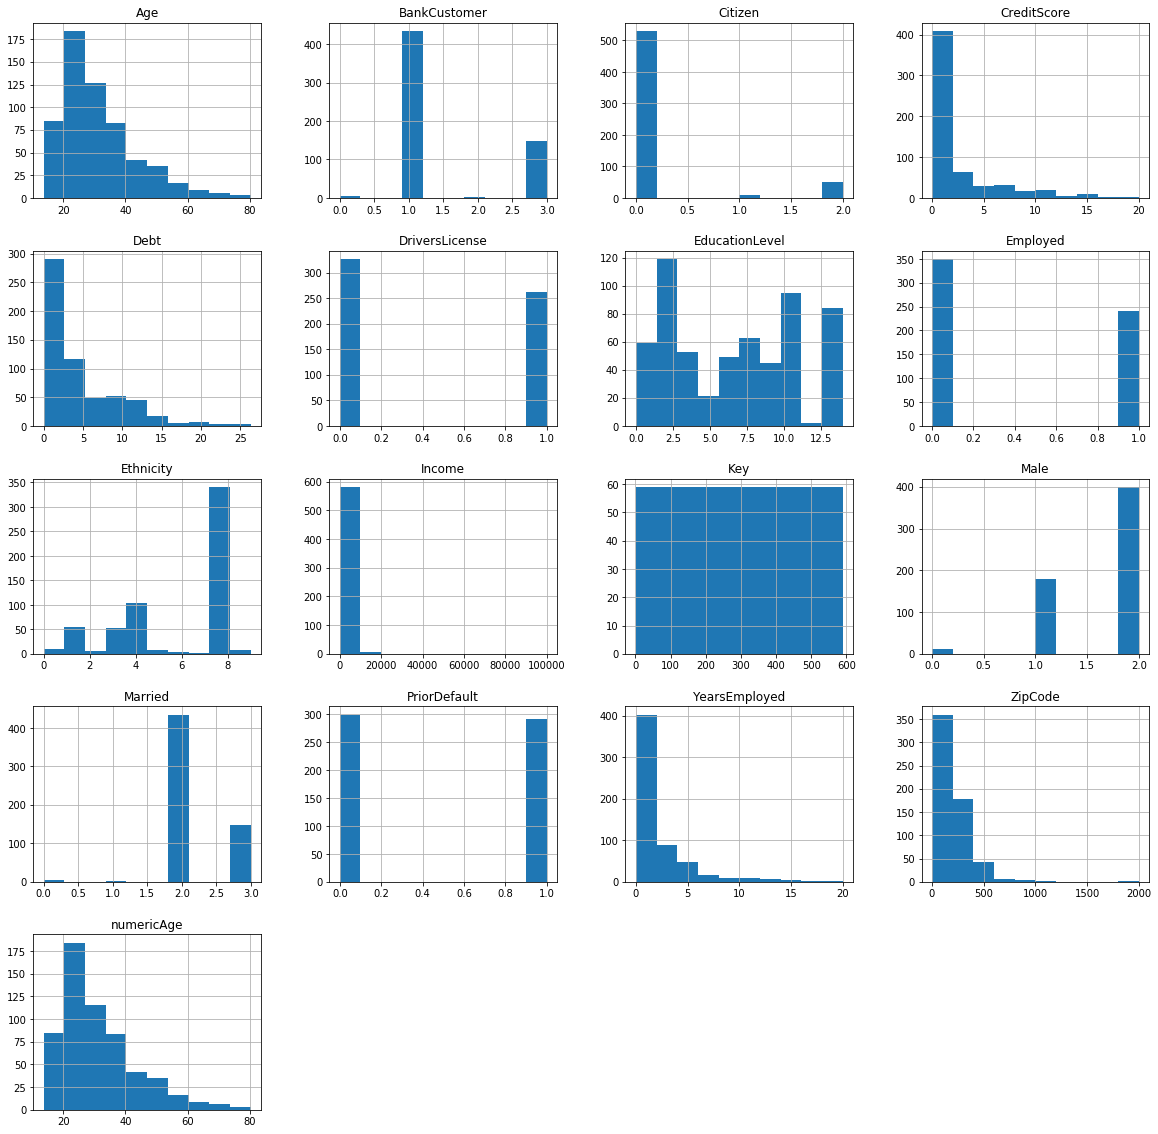

In [322]:
# Explore dataset
train.hist(figsize = (20, 20))
plt.show()

In [323]:
train.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,numericAge,numericZip
0,1,0,40.83,3.500,2,1,7,1,0.500,0,0,0,0,2,1160,0,-,40.83,1160
1,2,0,32.25,1.500,2,1,2,8,0.250,0,0,0,1,0,372,122,-,32.25,372
2,3,0,28.17,0.585,2,1,1,8,0.040,0,0,0,0,0,260,1004,-,28.17,260
3,4,0,29.75,0.665,2,1,13,8,0.250,0,0,0,1,0,300,0,-,29.75,300
4,5,0,26.50,2.710,3,3,0,0,0.085,0,0,0,0,2,80,0,-,26.50,80


<h2>Step 5: Feature Selection</h2>

In [324]:
#drop unncessary columns
train = train.drop(['numericAge', 'numericZip'], axis=1)

In [325]:
#Filter out Key and Approved column
X_train = train.iloc[:,1:16].values
X_train

array([[0.000e+00, 4.083e+01, 3.500e+00, ..., 2.000e+00, 1.160e+03,
        0.000e+00],
       [0.000e+00, 3.225e+01, 1.500e+00, ..., 0.000e+00, 3.720e+02,
        1.220e+02],
       [0.000e+00, 2.817e+01, 5.850e-01, ..., 0.000e+00, 2.600e+02,
        1.004e+03],
       ...,
       [2.000e+00, 1.617e+01, 4.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 2.267e+01, 1.650e-01, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.558e+01, 0.000e+00, ..., 1.000e+00, 1.450e+02,
        0.000e+00]])

In [326]:
len(train_y)

590

<h2>Step 6: Spliting Dataset into Train and Test datasets</h2>

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, train_y, test_size = 0.10, random_state = 0,stratify=train_y)
len(X_test)

59

<h2>Step 6: Fit Model</h2>
<p>I have tried 3 different models</p>
<li>1.LogisticRegression </li>
<li>1.RandomForest </li>
<li>1.Decision Tree </li>

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
clf_lr = LogisticRegression()
model = clf_lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro') )
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred) )

0.864406779661017
0.855036855036855
[[18  5]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.87      0.92      0.89        36

    accuracy                           0.86        59
   macro avg       0.86      0.85      0.86        59
weighted avg       0.86      0.86      0.86        59



/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [329]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred))
print('F1 score',f1_score(y_test, y_pred, average='macro') )
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred) )

=== Accuracy Score ===
0.7627118644067796
F1 score 0.7412280701754386
[[14  9]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        23
           1       0.78      0.86      0.82        36

    accuracy                           0.76        59
   macro avg       0.76      0.73      0.74        59
weighted avg       0.76      0.76      0.76        59



In [330]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=34)
RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)
print("=== Accuracy Score ===")
accuracy_score(y_test, y_pred)
print('F1 score',f1_score(y_test, y_pred, average='macro') )
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred) )

=== Accuracy Score ===
F1 score 0.8318023439974659
[[16  7]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        23
           1       0.83      0.94      0.88        36

    accuracy                           0.85        59
   macro avg       0.86      0.82      0.83        59
weighted avg       0.85      0.85      0.84        59



<h2>Step 7. Prepare Test Data</h2>

In [333]:
test = pd.read_csv('test.csv')
test.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


In [334]:
test.describe()

,Key,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,33.359400,5.639800,3.019150,4.490000,174.170000,1599.590000
std,29.011492,11.521954,5.624441,4.039917,8.824318,159.721225,6185.926674
min,1.000000,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,23.397500,1.000000,0.500000,0.000000,0.000000,0.000000
50%,50.500000,30.705000,4.125000,1.667500,1.000000,142.500000,26.000000
75%,75.250000,41.252500,9.508750,4.376250,6.000000,260.000000,509.250000
max,100.000000,58.670000,28.000000,28.500000,67.000000,711.000000,50000.000000


In [335]:
test.dtypes

Key                 int64
Male               object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode             int64
Income              int64
dtype: object

<h2>Test Data Cleaning :  Apply same operations that we did for Train Dataset</h2>

In [336]:
test['numericAge'] = test.loc[test.Age != '?', 'Age']
test['numericAge'] = test['numericAge'].astype('float64')
print('Mean Age ',test['numericAge'].mean())
test.loc[test.Age == '?', 'Age'] = test['numericAge'].mean()
test['Age'] = test['Age'].astype('float64')
test['Age'].fillna((test['Age'].mean()), inplace=True)

Mean Age  33.35940000000001


/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [337]:
test['numericZip'] = test.loc[test.ZipCode != '?', 'ZipCode']
s = test['numericZip'].value_counts()
test.loc[test.ZipCode == '?', 'ZipCode'] = s.index[-1]
test['ZipCode'] = test['ZipCode'].astype('int64')
test['ZipCode'].fillna(s.index[0], inplace=True)

In [338]:
test['Male'] = test['Male'].astype('category')
test['Married'] = test['Married'].astype('category')
test['BankCustomer'] = test['BankCustomer'].astype('category')
test['EducationLevel'] = test['EducationLevel'].astype('category')
test['Ethnicity'] = test['Ethnicity'].astype('category')
test['PriorDefault'] = test['PriorDefault'].astype('category')
test['Employed'] = test['Employed'].astype('category')
test['DriversLicense'] = test['DriversLicense'].astype('category')
test['Citizen'] = test['Citizen'].astype('category')

cat_columns = test.select_dtypes(['category']).columns
test[cat_columns] = test[cat_columns].apply(lambda x: x.cat.codes)


In [339]:
test.describe()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,numericAge,numericZip
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.670000,33.359400,5.639800,0.15000,0.15000,5.680000,2.460000,3.019150,0.700000,0.55,4.490000,0.530000,0.050000,174.170000,1599.590000,33.359400,174.170000
std,29.011492,0.493493,11.521954,5.624441,0.35887,0.35887,3.925776,0.757721,4.039917,0.460566,0.50,8.824318,0.501614,0.219043,159.721225,6185.926674,11.521954,159.721225
min,1.000000,0.000000,15.830000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,15.830000,0.000000
25%,25.750000,1.000000,23.397500,1.000000,0.00000,0.00000,2.000000,2.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,23.397500,0.000000
50%,50.500000,2.000000,30.705000,4.125000,0.00000,0.00000,6.000000,3.000000,1.667500,1.000000,1.00,1.000000,1.000000,0.000000,142.500000,26.000000,30.705000,142.500000
75%,75.250000,2.000000,41.252500,9.508750,0.00000,0.00000,9.000000,3.000000,4.376250,1.000000,1.00,6.000000,1.000000,0.000000,260.000000,509.250000,41.252500,260.000000
max,100.000000,2.000000,58.670000,28.000000,1.00000,1.00000,12.000000,3.000000,28.500000,1.000000,1.00,67.000000,1.000000,1.000000,711.000000,50000.000000,58.670000,711.000000


In [340]:
test.shape
test.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,numericAge,numericZip
0,1,2,31.83,0.04,1,1,8,3,0.040,0,0,0,0,0,0,0,31.83,0
1,2,1,21.75,11.75,0,0,1,3,0.250,0,0,0,1,0,180,0,21.75,180
2,3,1,17.92,0.54,0,0,1,3,1.750,0,1,1,1,0,80,5,17.92,80
3,4,2,30.33,0.50,0,0,3,2,0.085,0,0,0,1,1,252,0,30.33,252
4,5,2,51.83,2.04,1,1,5,1,1.500,0,0,0,0,0,120,1,51.83,120


<h2>Selecting Feature</h2>

In [344]:
#test = test.drop(['numericAge', 'numericZip'], axis=1)
X_test = test.iloc[:,1:16].values
X_test

array([[2.0000e+00, 3.1830e+01, 4.0000e-02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.1750e+01, 1.1750e+01, ..., 0.0000e+00, 1.8000e+02,
        0.0000e+00],
       [1.0000e+00, 1.7920e+01, 5.4000e-01, ..., 0.0000e+00, 8.0000e+01,
        5.0000e+00],
       ...,
       [1.0000e+00, 2.0750e+01, 1.0335e+01, ..., 0.0000e+00, 8.0000e+01,
        5.0000e+01],
       [2.0000e+00, 3.9920e+01, 6.2100e+00, ..., 0.0000e+00, 2.0000e+02,
        3.0000e+02],
       [2.0000e+00, 2.5670e+01, 1.2500e+01, ..., 0.0000e+00, 1.4000e+02,
        2.5800e+02]])

<h2>Apply LogisticRegression<h2>

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
clf_lr = LogisticRegression()
model = clf_lr.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
len(y_pred1)

/home/redwuie/miniconda3/envs/py3.7.3_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


100

<h2>Save Predictions</h2>

In [347]:
df1 = pd.DataFrame()
df1['Key'] = test['Key']

In [348]:
df1['Approved'] = encoder.inverse_transform(y_pred1)


In [349]:
df1.reset_index(drop=True)

,Key,Approved
0,1,-
1,2,-
2,3,+
3,4,-
4,5,-
5,6,-
6,7,-
7,8,-
8,9,-
9,10,-


<h2>Save final dataframe to CSV</h2>

In [350]:
df1.to_csv('FinalSolution.csv',index=False)